In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

In [4]:
# Creating a DataFrame from a CSV file
transport = pd.read_csv('dataset.csv')

#Take a quick look at the data such as using head, describe, info
print(transport.head())
print(transport.info())
print(transport.describe())

        ID  travel_fee             departure_time  departure_long  \
0  54:00.0         7.0  2013-07-02 19:54:00+00:00      -74.005360   
1  21:31.0         5.5  2013-09-28 00:21:31+00:00      -74.014165   
2  18:00.0        21.5  2013-06-16 03:18:00+00:00      -73.991075   
3  43:00.0         9.5  2013-07-20 13:43:00+00:00      -74.002662   
4  57:17.0        15.5  2013-11-05 22:57:17+00:00      -73.962397   

   departure_lat  arrival_long  arrival_lat  occupancy  
0      40.728867    -74.008913    40.710907        1.0  
1      40.708941    -74.016310    40.716734        1.0  
2      40.760352    -73.941382    40.713292        1.0  
3      40.723630    -73.991722    40.748905        5.0  
4      40.712705    -73.996834    40.680403        2.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12886 entries, 0 to 12885
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              12886 non-null  object 


In [5]:
# Exploring categorical variables
categorical_columns = ['ID','departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(transport[column].unique())
    print("Value counts:")
    print(transport[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long',"departure_lat",'arrival_long','arrival_lat', 'occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", transport[column].min())
    print("Maximum:", transport[column].max())
    print("Mean:", transport[column].mean())
    print("Standard deviation:", transport[column].std())


Unique values in ID
['54:00.0' '21:31.0' '18:00.0' ... '08:52.0' '38:12.0' '30:01.0']
Value counts:
19:00.0    132
31:00.0    131
02:00.0    131
09:00.0    124
16:00.0    123
          ... 
41:16.0      1
49:59.0      1
47:29.0      1
14:37.0      1
30:01.0      1
Name: ID, Length: 2994, dtype: int64

Unique values in departure_time
['2013-07-02 19:54:00+00:00' '2013-09-28 00:21:31+00:00'
 '2013-06-16 03:18:00+00:00' ... '2013-09-03 14:30:01+00:00'
 '2013-01-12 10:23:31+00:00' nan]
Value counts:
2013-11-22 23:58:00+00:00    3
2013-02-27 18:51:00+00:00    2
2013-02-13 14:28:00+00:00    2
2013-06-14 19:49:00+00:00    2
2013-05-22 21:28:00+00:00    2
                            ..
2013-06-05 17:33:00+00:00    1
2013-04-05 23:07:41+00:00    1
2013-10-11 18:41:00+00:00    1
2013-05-14 13:54:00+00:00    1
2013-01-12 10:23:31+00:00    1
Name: departure_time, Length: 12768, dtype: int64

Statistics for travel_fee
Minimum: 0.0
Maximum: 139.75
Mean: 12.606824990298797
Standard deviation: 10.643

### Visualization

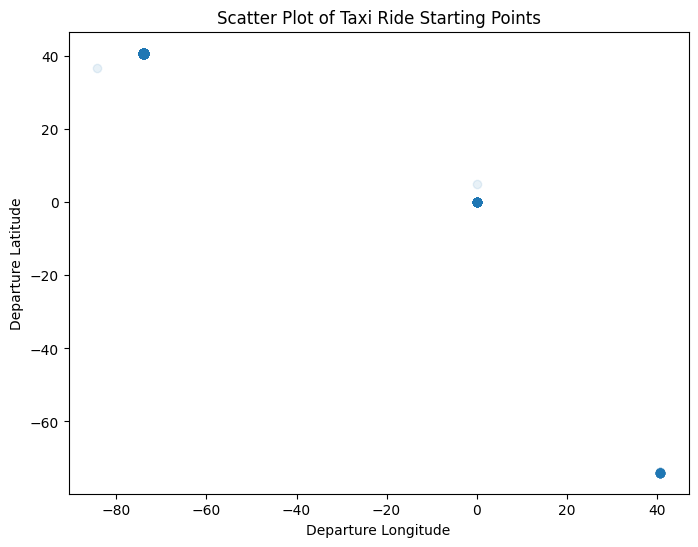

In [6]:
#Diagram 1 Departure longtitude and longtitude
plt.figure(figsize=(8, 6))
plt.scatter(transport['departure_long'], transport['departure_lat'] , alpha=0.1)
plt.xlabel('Departure Longitude')
plt.ylabel('Departure Latitude')
plt.title('Scatter Plot of Taxi Ride Starting Points')
plt.show()

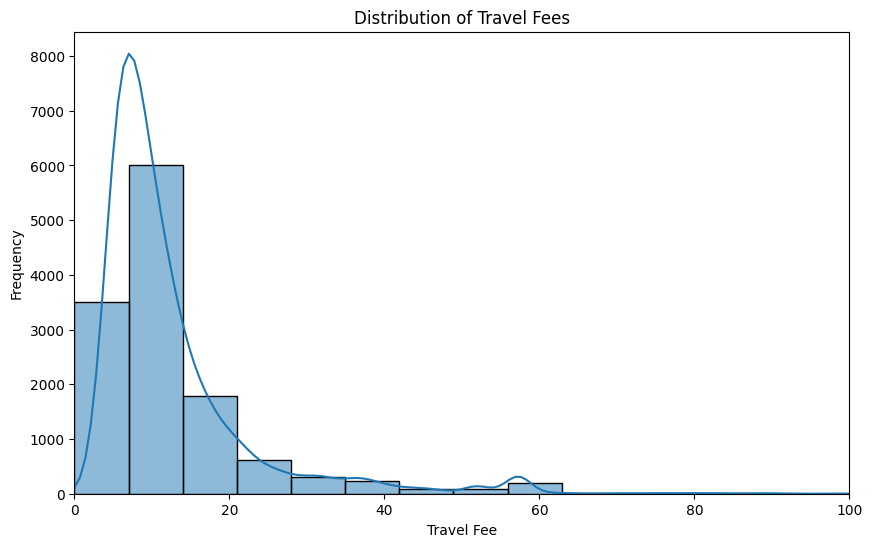

In [7]:
# Diagram 2 Distribution of travel fees
plt.figure(figsize=(10, 6))
sns.histplot(data=transport, x='travel_fee', bins=20, kde=True)
plt.title('Distribution of Travel Fees')
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

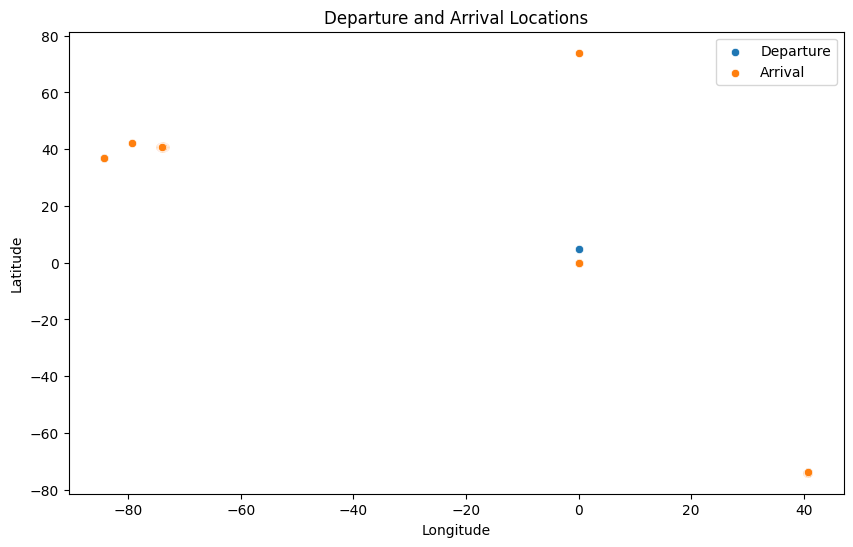

In [8]:
#Diagram 3 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transport, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=transport, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

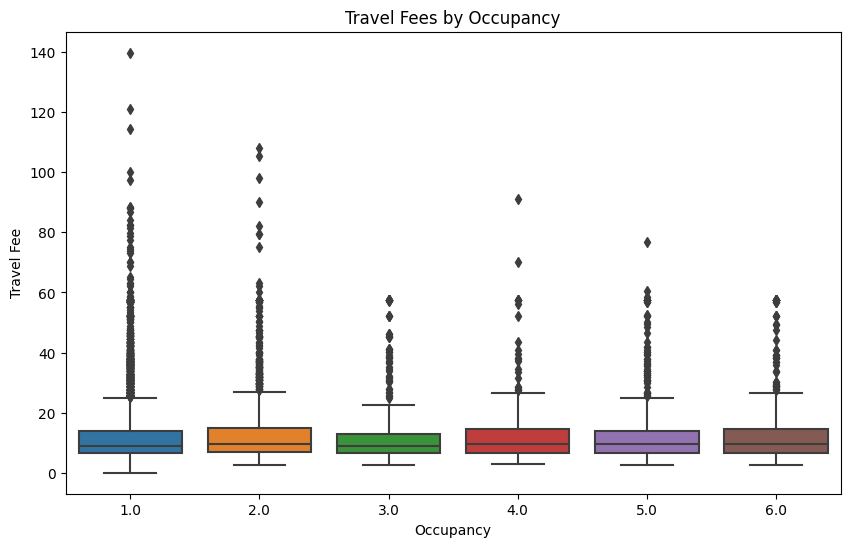

In [9]:
# Diagram 4 Boxplot of travel fees by occupancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=transport, x='occupancy', y='travel_fee')
plt.title('Travel Fees by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.show()

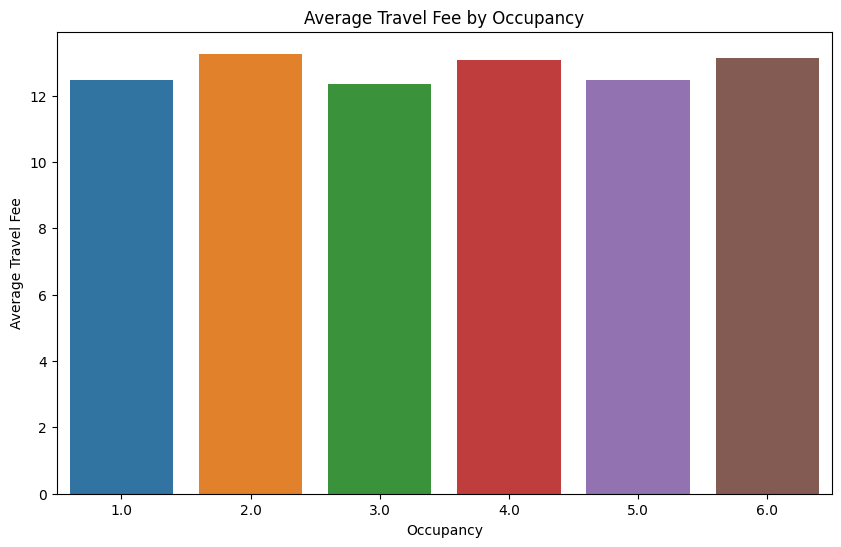

In [10]:
# Diagram 5 Average travel fee by occupancy
avg_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

### Correlation

In [11]:
corr_matrix = transport.corr(numeric_only=True)
corr_matrix

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
travel_fee,1.000000,-0.002430,0.000630,0.010645,-0.009819,0.011261
departure_long,-0.002430,1.000000,-0.956375,0.964017,-0.934377,0.000269
departure_lat,0.000630,-0.956375,1.000000,-0.925073,0.980165,-0.005607
arrival_long,0.010645,0.964017,-0.925073,1.000000,-0.952437,0.000800
arrival_lat,-0.009819,-0.934377,0.980165,-0.952437,1.000000,-0.006216
occupancy,0.011261,0.000269,-0.005607,0.000800,-0.006216,1.000000


### Query Date

In [12]:
# 1. Query to find the average travel fee:
average_travel_fee = transport['travel_fee'].mean()
print("Average Travel Fee:", average_travel_fee)

Average Travel Fee: 12.606824990298797


In [13]:
# 2. Query to find the most common departure hour:
transport['departure_hour'] = pd.to_datetime(transport['departure_time']).dt.hour
most_common_departure_hour = transport['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19.0


In [14]:
# Query 3: Travel Fee Range
min_travel_fee = transport['travel_fee'].min()
max_travel_fee = transport['travel_fee'].max()
print("Travel Fee Range: {} - {}".format(min_travel_fee, max_travel_fee))

Travel Fee Range: 0.0 - 139.75


In [15]:
# Query 4: Average Travel Fee by Occupancy
average_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
1.0    12.465820
2.0    13.260783
3.0    12.346740
4.0    13.065170
5.0    12.455220
6.0    13.134948
Name: travel_fee, dtype: float64


In [16]:
# Query 5: Average Travel Fee by Hour
transport['departure_time'] = pd.to_datetime(transport['departure_time'])
transport['hour'] = transport['departure_time'].dt.hour
average_fee_by_hour = transport.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0.0     12.990909
1.0     12.619424
2.0     11.703593
3.0     13.244022
4.0     15.211479
5.0     17.562941
6.0     13.243378
7.0     12.482652
8.0     11.610638
9.0     11.696690
10.0    12.866417
11.0    12.002065
12.0    11.786295
13.0    13.278655
14.0    13.612736
15.0    12.625884
16.0    14.345437
17.0    13.052637
18.0    12.022494
19.0    11.872093
20.0    12.000110
21.0    12.180663
22.0    12.270533
23.0    13.203963
Name: travel_fee, dtype: float64


In [17]:
# Query 6: Busiest Departure Locations
most_common_departures = transport.groupby(['departure_lat', 'departure_long']).size().nlargest(5)
print("Busiest Departure Locations:")
print(most_common_departures)

Busiest Departure Locations:
departure_lat  departure_long
 0.000000       0.000000         198
 40.744916     -73.949047          2
 40.765967     -73.834610          2
-74.015385      40.709325          1
-74.014630      40.713830          1
dtype: int64


In [18]:
# Query 7: Popular Travel Routes
popular_routes = transport.groupby(['departure_lat', 'departure_long', 'arrival_lat', 'arrival_long']).size().nlargest(5)
print("Popular Travel Routes:")
print(popular_routes)

Popular Travel Routes:
departure_lat  departure_long  arrival_lat  arrival_long
 0.000000       0.000000        0.000000     0.000000       195
 40.744916     -73.949047       40.744916   -73.949047        2
 40.765967     -73.834610       40.765967   -73.834610        2
-74.015385      40.709325      -74.011693    40.710520        1
-74.014630      40.713830      -73.979102    40.667377        1
dtype: int64


### Data Preprocessing

In [19]:
sample_size = min(500000, len(transport))
transport = transport.sample(n=sample_size)


travelfee_train, travelfee_test = train_test_split(transport, test_size=0.2, random_state=42)

print("Length of travelfee_train:", len(travelfee_train))
print("Length of travelfee_test:", len(travelfee_test))

Length of travelfee_train: 10308
Length of travelfee_test: 2578


In [20]:
#check is there any data is null value
travelfee_train.isnull().sum()

ID                0
travel_fee        1
departure_time    1
departure_long    1
departure_lat     1
arrival_long      1
arrival_lat       1
occupancy         1
departure_hour    1
hour              1
dtype: int64

In [21]:
#handling missing value
travelfee_train["departure_long"].fillna(travelfee_train["departure_long"].mean(), inplace=True)
travelfee_train["departure_lat"].fillna(travelfee_train["departure_lat"].mean(), inplace=True)
travelfee_train["occupancy"].fillna(travelfee_train["occupancy"].mode()[0], inplace=True)
travelfee_train.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
travelfee_train.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
travelfee_train.isnull().sum()

# Drop rows with a 0 value of occupancy
travelfee_train = travelfee_train.drop(travelfee_train[travelfee_train['occupancy'] <= 0].index)

# Handling Outliers
# Select columns for numeric attributes
num_attribs = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'travel_fee']

# Remove outliers using Z-score method
z_scores = np.abs((travelfee_train[num_attribs] - travelfee_train[num_attribs].mean()) / travelfee_train[num_attribs].std())
travelfee_train = travelfee_train[(z_scores < 3).all(axis=1)]
travelfee_train.info()
travelfee_train

# Filter out rows with 0 values in departure_long, departure_lat, arrival_long, and arrival_lat
travelfee_train = travelfee_train[
    (travelfee_train["departure_long"] != 0) &
    (travelfee_train["departure_lat"] != 0) &
    (travelfee_train["arrival_long"] != 0) &
    (travelfee_train["arrival_lat"] != 0)
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9459 entries, 8457 to 4781
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   travel_fee      9459 non-null   float64            
 1   departure_time  9459 non-null   datetime64[ns, UTC]
 2   departure_long  9459 non-null   float64            
 3   departure_lat   9459 non-null   float64            
 4   arrival_long    9459 non-null   float64            
 5   arrival_lat     9459 non-null   float64            
 6   occupancy       9459 non-null   float64            
 7   departure_hour  9459 non-null   float64            
 8   hour            9459 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 739.0 KB


In [22]:
# Convert departure_time to datetime
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])

# Extract features from departure_time
travelfee_train['hour_of_day'] = travelfee_train['departure_time'].dt.hour
travelfee_train['day_of_week'] = travelfee_train['departure_time'].dt.dayofweek

# Calculate Euclidean distance between departure and arrival locations
travelfee_train['distance'] = travelfee_train.apply(lambda row: euclidean((row['departure_lat'], row['departure_long']),
                                                             (row['arrival_lat'], row['arrival_long'])), axis=1)


In [23]:
travelfee_train.info()
travelfee_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9459 entries, 8457 to 4781
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   travel_fee      9459 non-null   float64            
 1   departure_time  9459 non-null   datetime64[ns, UTC]
 2   departure_long  9459 non-null   float64            
 3   departure_lat   9459 non-null   float64            
 4   arrival_long    9459 non-null   float64            
 5   arrival_lat     9459 non-null   float64            
 6   occupancy       9459 non-null   float64            
 7   departure_hour  9459 non-null   float64            
 8   hour            9459 non-null   float64            
 9   hour_of_day     9459 non-null   int64              
 10  day_of_week     9459 non-null   int64              
 11  distance        9459 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(2)
memory usage: 960.7 KB


,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,departure_hour,hour,hour_of_day,day_of_week,distance
8457,21.00,2013-11-10 11:38:24+00:00,-74.016015,40.715213,-73.975100,40.755829,3.0,11.0,11.0,11,6,0.057652
8420,4.00,2013-01-27 15:18:00+00:00,-73.961382,40.771350,-73.985322,40.778562,5.0,15.0,15.0,15,6,0.025003
2309,10.00,2013-06-08 21:38:00+00:00,-73.966983,40.772582,-73.978555,40.741142,2.0,21.0,21.0,21,5,0.033502
4207,27.44,2013-05-26 11:33:13+00:00,-73.975050,40.787803,-73.911645,40.892302,1.0,11.0,11.0,11,6,0.122230
10456,21.50,2013-05-26 19:59:50+00:00,-73.981025,40.753713,-73.981671,40.690139,1.0,19.0,19.0,19,6,0.063577


In [24]:
travelfee = travelfee_train[['hour_of_day', 'day_of_week','occupancy','distance']]
travelfee_labels = travelfee_train["travel_fee"].copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(travelfee, travelfee_labels, test_size=0.2, random_state=42)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = [ 'hour_of_day', 'day_of_week','occupancy','distance' ]

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])

In [26]:
transport_prepared = preprocessing.fit_transform(travelfee)
transport_prepared

array([[-0.37190621,  1.5104432 ,  1.36746852,  0.41612603],
       [ 0.2360891 ,  1.5104432 ,  3.22047113, -0.0968226 ],
       [ 1.14808205,  0.99736117,  0.44096721,  0.03671056],
       ...,
       [-1.89189447,  1.5104432 ,  0.44096721, -0.01751746],
       [ 0.08409027,  0.99736117,  1.36746852, -0.13777913],
       [-0.97990151,  1.5104432 , -0.48553409, -0.29477186]])

In [27]:
preprocessing.get_feature_names_out()

array(['num__hour_of_day', 'num__day_of_week', 'num__occupancy',
       'num__distance'], dtype=object)

Visualisation and Query after Data Preprocessing

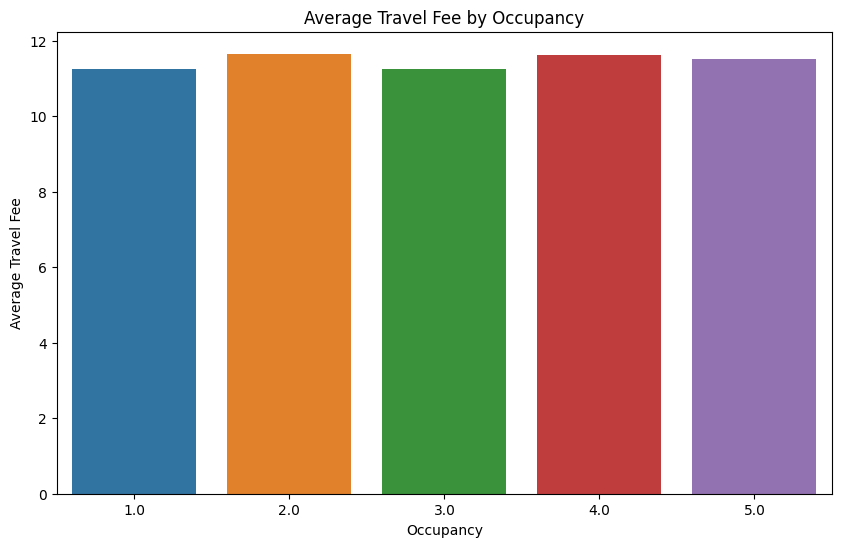

In [28]:
# Diagram 1 Average travel fee by occupancy
avg_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

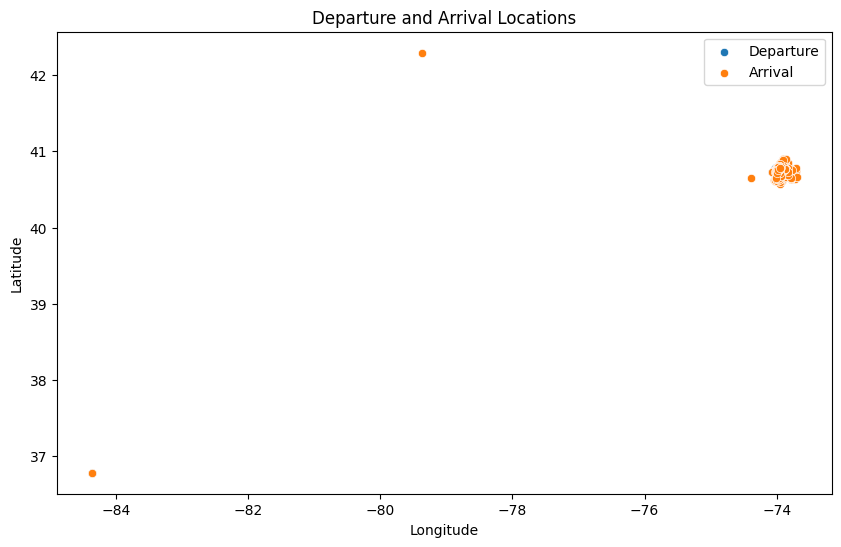

In [29]:
#Diagram 2 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=travelfee_train, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=travelfee_train, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [30]:
# Query 1. Query to find the most common departure hour:
travelfee_train['departure_hour'] = pd.to_datetime(travelfee_train['departure_time']).dt.hour
most_common_departure_hour = travelfee_train['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [31]:
# Query 2: Average Travel Fee by Occupancy
average_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
1.0    11.235029
2.0    11.651688
3.0    11.240309
4.0    11.621881
5.0    11.517878
Name: travel_fee, dtype: float64


In [32]:
# Query 3: Average Travel Fee by Hour
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])
travelfee_train['hour'] = travelfee_train['departure_time'].dt.hour
average_fee_by_hour = travelfee_train.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     11.811946
1     12.255210
2     11.206881
3     12.282466
4     13.780000
5     12.356889
6     11.287826
7     10.420056
8     10.821126
9     11.066507
10    11.358905
11    10.987311
12    11.410021
13    11.105368
14    11.073015
15    11.098446
16    11.812749
17    11.230887
18    11.091707
19    11.230729
20    10.863853
21    11.401844
22    11.406395
23    12.052940
Name: travel_fee, dtype: float64


### Modelling

### Model 1: Random Forest Regressor

In [33]:
#Predict fair price
#Model 1: Random Reofest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(forest_reg, x1_train, y1_train,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
forest_rmses

array([3.20249003, 3.17588009, 3.29626522])

In [34]:
pd.Series(forest_rmses).describe()

count    3.000000
mean     3.224878
std      0.063238
min      3.175880
25%      3.189185
50%      3.202490
75%      3.249378
max      3.296265
dtype: float64

In [35]:
from sklearn.model_selection import cross_validate
forest_rmses = cross_validate(forest_reg,
                              x1_train, y1_train,
                              scoring="neg_root_mean_squared_error",
                              cv=2,
                              return_train_score=True)

forest_rmses

{'fit_time': array([1.50796103, 0.99076796]),
 'score_time': array([0.07635903, 0.07313561]),
 'test_score': array([-3.17254296, -3.21178073]),
 'train_score': array([-1.26685443, -1.1963968 ])}

In [36]:
forest_reg.fit(x1_train, y1_train)
travelfee_predictions = forest_reg.predict(x1_train)
forest_rmse = mean_squared_error(y1_train,
                                 travelfee_predictions,
                                 squared=False)
forest_rmse

1.2157701576610493

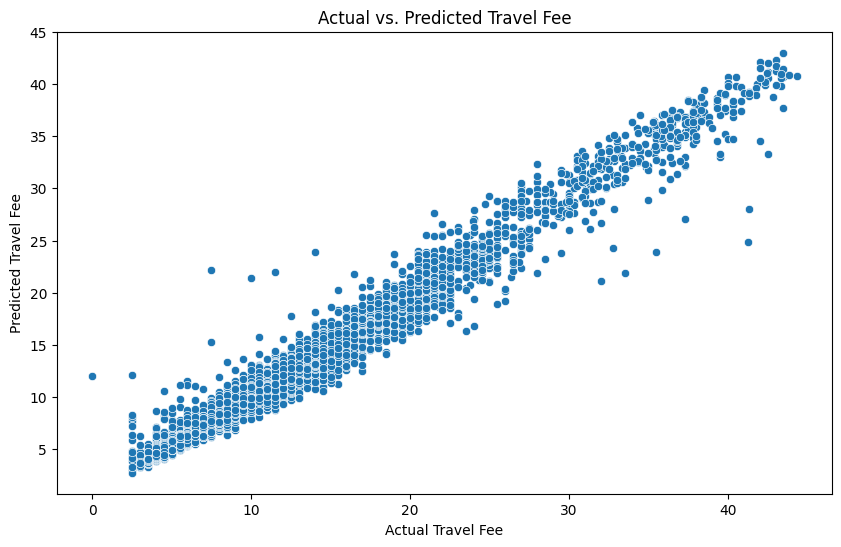

In [37]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_train, y=travelfee_predictions)
plt.xlabel('Actual Travel Fee')
plt.ylabel('Predicted Travel Fee')
plt.title('Actual vs. Predicted Travel Fee')
plt.show()

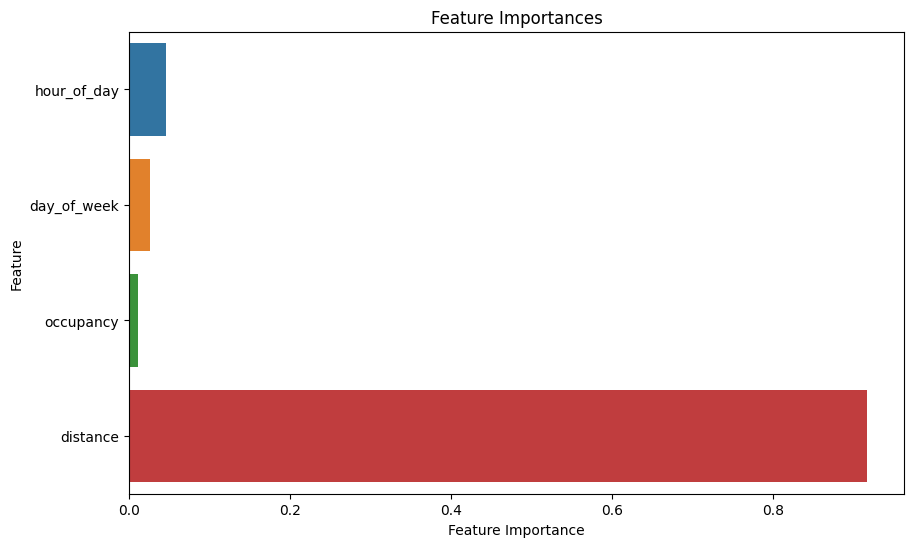

In [38]:
# Feature Importance Bar Plot:
# Get feature importances from the trained Random Forest model
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=num_attribs)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

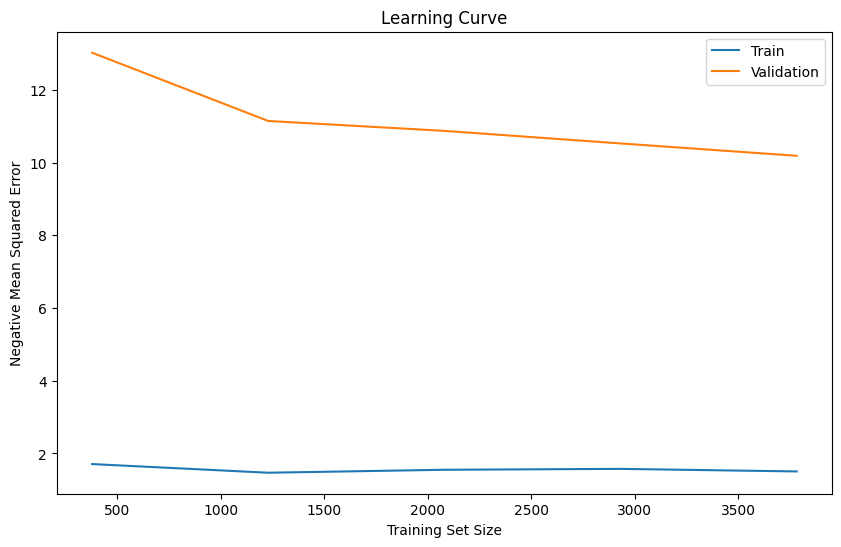

In [39]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest_reg, x1_train, y1_train, cv=2, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [40]:
# Create a DataFrame to display actual and predicted prices
result_df = pd.DataFrame({
    'Actual Price': y1_train,
    'Predicted Price': travelfee_predictions
})

# Display the first few rows of the DataFrame
print(result_df.head())

       Actual Price  Predicted Price
12534           7.5             8.51
9636            5.0             5.87
1227            4.5             4.58
3603           11.0            11.71
10215          10.5             9.68


### Random Forest Model Fine Tuning

In [41]:
### Model 1: Random Forest Regressor

In [42]:
rf_regressor = RandomForestRegressor(random_state=42)
# Create a pipeline with preprocessing and random forest regressor
rf_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rf_reg", rf_regressor),
])

# Define the parameter grid for hyperparameter tuning
param_distributions = [
    {'rf_reg__n_estimators': [100, 200, 300],
     'rf_reg__max_depth': [None, 10, 20],
     'rf_reg__min_samples_split': [2, 5, 10]}
]

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_full_pipeline, param_distributions, cv=2, scoring='neg_mean_squared_error')

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
grid_search_rf.fit(x1_train, y1_train)

# Calculate RMSE and standard deviation of RMSE for grid search
grid_rmse_scores = np.sqrt(-grid_search_rf.cv_results_['mean_test_score'])
grid_rmse_mean = np.mean(grid_rmse_scores)
grid_rmse_std = np.std(grid_rmse_scores)


# Print the results
print("Grid Search RMSE - Mean:", grid_rmse_mean)
print("Grid Search RMSE - Standard Deviation:", grid_rmse_std)
# Print best parameters
print("Tuned hyperparameters (best parameters):", grid_search_rf.best_params_)


Grid Search RMSE - Mean: 3.123140913146415
Grid Search RMSE - Standard Deviation: 0.04405325748443841
Tuned hyperparameters (best parameters): {'rf_reg__max_depth': 10, 'rf_reg__min_samples_split': 10, 'rf_reg__n_estimators': 300}


### Model 2: Ridge Refression

In [43]:
#Predict fair price
#Model 2: Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x1_train, y1_train)

Ridge()

In [45]:
ridge_score = cross_val_score(ridge_model, x1_train, y1_train, cv=5,verbose=2)
print("Ridge Score: ", ridge_score)
print(ridge_score.mean(),ridge_score.std())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Ridge Score:  [  0.189944     0.1966284    0.19498331   0.17444346 -12.9535336 ]
-2.439506883386388 5.257019191600506


### Ridge Regression Fine Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

In [47]:
# Define the hyperparameters grid
parameters = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}


In [48]:
# Create Ridge regression model
ridge_cv = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(x1_train, y1_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [49]:
# Get the best Ridge model
best_ridge = ridge_cv.best_estimator_

In [50]:
# Calculate RMSE for each fold and mean RMSE
mse_scores = -ridge_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

In [51]:
# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", ridge_cv.best_params_)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Best Hyperparameters: {'alpha': 50}
Mean RMSE: 12.450255734327722
Standard Deviation of RMSE: 3.5795979809215095


### Model 3: Lasso Regression

In [52]:
#Predict fair price
#Model 3: Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(
    preprocessing,
    Lasso(alpha=0.01,random_state=42)

)

In [54]:
lasso_mse_scores = -cross_val_score(lasso_reg, x1_train, y1_train, scoring="neg_mean_squared_error", cv=5)
lasso_rmse_scores = np.sqrt(lasso_mse_scores)

In [55]:
lasso_mse = lasso_mse_scores.mean()

# Print MSE and RMSE scores
print("Lasso Regression Mean Squared Error (MSE):", lasso_mse)
print("Lasso Regression RMSE Scores:", lasso_rmse_scores)
print("Mean RMSE:", lasso_rmse_scores.mean())
print("Standard Deviation of RMSE:", lasso_rmse_scores.std())

Lasso Regression Mean Squared Error (MSE): 247.5561604091469
Lasso Regression RMSE Scores: [ 6.61121264  6.59139126  6.15330574  6.71192955 32.67587888]
Mean RMSE: 11.7487436151298
Standard Deviation of RMSE: 10.465332478000573


### Lasso Regression Fine Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
# Define the hyperparameters grid
parameters = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

In [58]:
# Create lasso regression model
lasso_cv = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(x1_train, y1_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [59]:
# Get the best Ridge model
print("Best Parameters for Lasso Regression:", lasso_cv.best_params_)

Best Parameters for Lasso Regression: {'alpha': 1}


In [60]:
# Calculate RMSE for each fold and mean RMSE
mse_scores = -lasso_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

In [61]:
# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", lasso_cv.best_params_)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Best Hyperparameters: {'alpha': 1}
Mean RMSE: 10.093116156892163
Standard Deviation of RMSE: 3.234829004986021


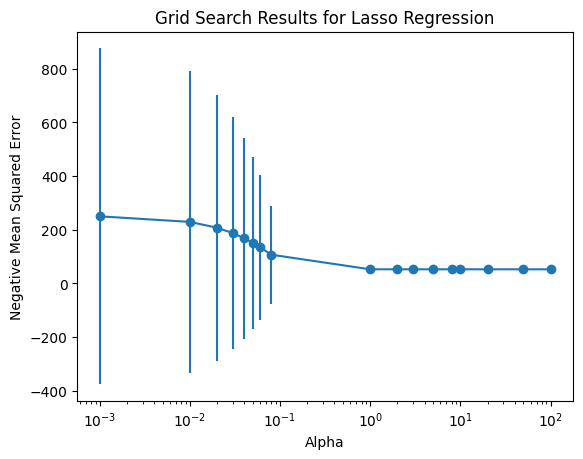

In [62]:
import matplotlib.pyplot as plt

# Extract the grid search results
results = lasso_cv.cv_results_
alphas = lasso_cv.param_grid['alpha']
neg_mse_means = -results['mean_test_score']
neg_mse_stds = results['std_test_score']

# Plot the mean negative MSE with error bars
plt.errorbar(alphas, neg_mse_means, yerr=neg_mse_stds, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results for Lasso Regression')
plt.xscale('log')  # Use a logarithmic scale for x-axis
plt.show()


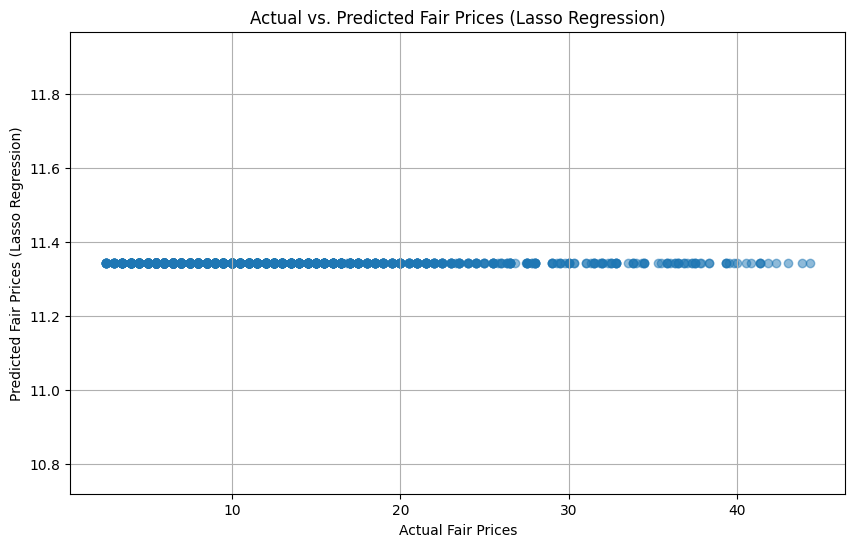

In [63]:
# Assuming lasso_cv is a fitted GridSearchCV object
lasso_model = lasso_cv.best_estimator_  # Get the best-fitted Lasso model from the GridSearchCV

# Assuming x1_test and y1_test are your test data
lasso_predicted_fair_prices = lasso_model.predict(x1_test)

# Plotting a graph to compare actual vs. predicted fair prices
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, lasso_predicted_fair_prices, alpha=0.5)
plt.xlabel('Actual Fair Prices')
plt.ylabel('Predicted Fair Prices (Lasso Regression)')
plt.title('Actual vs. Predicted Fair Prices (Lasso Regression)')
plt.grid(True)